# 분류 (Classification)
- 어떤 대상을 정해진 범주에 구분해 넣는 작업
- **주어진 특성에 따라 어떤 대상을 범주(target)로 구분하는 방법**
    - 레이블 또는 타겟이 범주형일때 사용
- 범주가 2개인 경우 **이진 분류 (Binary Classification)**
- 범주가 세개 이상인 경우 **다중 분류 (MultiClass Classification)**

In [1]:
# 분류 예측 결과 데이터 불러오기
import pandas as pd
df = pd.read_csv('/mnt/elice/dataset/classification result.csv')
df

,실제값,예측값
0,0,0
1,1,1
2,0,0
3,1,1
4,1,0
5,0,0
6,1,0


## 혼동 행렬(Confusion Matrix)
- `sklearn.metrics.confusion_matrix`
- 예측 값이 실제 값과 일치하는지 분류하는 분류표
- 표의 한쪽 열에는 예측한 범주, 다른 한쪽은 실제 범주를 나타냄
- 이진 분류의 경우 예측한 범주와 실제 범주에 따라 4가지 지표로 볼 수 있음
    - True Positive : Positive로 예측된 결과가 맞음
    - False Negative : Negative로 예측된 결과가 틀림
    - False Positive : Positive로 예측된 결과가 틀림
    - True Negative : Negative로 예측된 결과가 맞음

In [2]:
# 혼동 행렬 계산
from sklearn.metrics import confusion_matrix
confusion_matrix(df['실제값'], df['예측값'])
# 실제값과 예측값을 주면 알아서 혼동행렬(2차원 리스트로)을 계산해준다.

array([[3, 0],
       [2, 2]])

In [3]:
# 혼동 행렬 계산 결과 저장
tn, fp, fn, tp = confusion_matrix(df['실제값'], df['예측값']).ravel() # 1차원 데이터로 만들어준다.
print('True Negative :', tn)
print('False Positive :', fp)
print('False Negative :', fn)
print('True Positive :', tp)

True Negative : 3
False Positive : 0
False Negative : 2
True Positive : 2


## 정확도(Accuracy) 
- `sklearn.metrics.accuracy_score`
- (𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝐹𝑁+𝐹𝑃+𝑇𝑁)
- 전체 데이터 중 올바르게 분류 한 비율

In [4]:
(tp + tn) / (tp + fn + fp + tn)

0.7142857142857143

In [5]:
from sklearn.metrics import accuracy_score # sklearn.metrics : 평가함수들이 모여있는 라이브러리
accuracy_score(df['실제값'], df['예측값'])

0.7142857142857143

## 재현률(Recall)
- `sklearn.metrics.recall_score`
- 𝑇𝑃/(𝑇𝑃+𝐹𝑁)
- 실제 전체 긍정 수에서 참 긍정의 비율

In [6]:
tp / (tp + fn)

0.5

In [7]:
from sklearn.metrics import recall_score
recall_score(df['실제값'], df['예측값'])

0.5

## 정밀도(Precision)  
- `sklearn.metrics.precision_score`
- 𝑇𝑃/(𝑇𝑃+𝐹𝑃)
- 예측한 전체 긍정 중 참 긍정의 비율


In [8]:
tp / (tp + fp)

1.0

In [9]:
from sklearn.metrics import precision_score
precision_score(df['실제값'], df['예측값'])

1.0

## F1 Score  
- `sklearn.metrics.f1_score`
- 2𝑇𝑃/(2𝑇𝑃+𝐹𝑃+𝐹𝑁)
- 정밀도와 재현율의 조화 평균
- 정밀도과 재현율이 0에 가까울수록 F1 score도 동일하게 낮은 값을 갖도록 하기 위함

In [10]:
2 * tp / (2 * tp + fp + fn)

0.6666666666666666

In [11]:
from sklearn.metrics import f1_score
f1_score(df['실제값'], df['예측값'])

0.6666666666666666

## RoC(Receiver operating characteristic) Curve
- `sklearn.metrics.roc_curve`
- 거짓 긍정 비율(FPR)과 참 긍정 비율(TPR) 간의 관계


In [12]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df['실제값'], df['예측값'])

# 처음과 마지막 값은 그래프를 그리기 위해 사용되는 값
print('FPR', fpr[1:-1]) # 그래서 0번째말고 1번째부터 -2번째까지만 들고온 것
print('TPR', tpr[1:-1])
print('thresholds', thresholds[1:-1])

FPR [0.]
TPR [0.5]
thresholds [1]


## AUC(Area Under the Curve)
- `sklearn.metrics.roc_auc_score`
- Curve 영역의 면적
    - 1에 가까울수록 성능이 좋음

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df['실제값'], df['예측값'])

0.75

In [16]:
from sklearn.metrics import auc
auc(fpr, tpr) # X축, Y축

0.75

# RoC Cruve 시각화

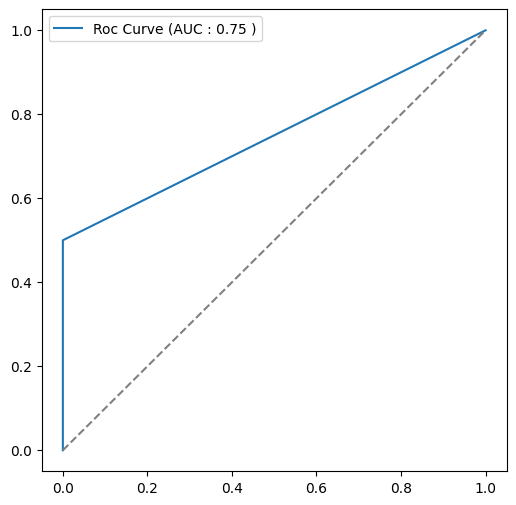

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'Roc Curve (AUC : {auc(fpr, tpr)} )')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.legend()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(df['실제값'], df['예측값'])) # support는 데이터 개수

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.50      0.67         4

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7



## 제출

제출을 위해 새로 불러온 `classification result.csv` 데이터에서 혼동 행렬을 계산한 결과를 `result_np`에 저장하세요.
- 1차원으로 변환해서 tp, fp, fn, tn 값을 따로 저장하는 게 아닌 **2차원 행렬 형태 그대로 저장하세요**.

In [19]:
df = pd.read_csv('/mnt/elice/dataset/classification result.csv')

# TODO: 혼동 행렬을 계산하세요.
result_np = confusion_matrix(df['실제값'], df['예측값'])

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [20]:
import os
import numpy as np

np.save('result.npy', result_np)

os.system('elice_grade result.npy cds_ai_exercise.ipynb')

send files ['result.npy', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 2.329 seconds
=== Message ===
제출 완료되었습니다.


0